# Monty Hall problem

Simulate three doors, one car, and two goats.
- Simulate three players: the switcher, the conservative, and the newcomer. 
- Record who wins.
- Repeat it many times.
- Which player do you want to be?

- What would happen if you had 100 doors to choose from and the presenter opens 98 or them?

In [1]:
#importing packages
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from tqdm.notebook import tqdm

# plot options
rc = {"text.usetex": True,
      "font.family": "serif",
      "font.sans-serif": ["Computer Modern"]
     }
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [2]:
def players_old(player, doors):

    if player == 'switcher': 
        a = rnd.choice(doors)
        #print(a)
        
        if a == 1:          #in this case the switcher will always lose
            newdoors = np.delete(doors, (doors == a).argmax())   #remove previous door from possible choices
            newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes a goat
            return rnd.choice(newdoors)  #[0]
            
        elif a == 0:        #in this case the switcher will always win
            newdoors = np.delete(doors, (doors == a).argmax())   #remove previous door from possible choices
            newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes a goat
            return rnd.choice(newdoors)  #[1]
        
        else:
            return 2
            
    if player == 'conservative':
        return rnd.choice(doors)
        #print(b)

    if player == 'newcomer':
        newdoors = np.delete(doors, (doors == 0).argmax())   #the presenter removes a goat
        return rnd.choice(newdoors)
        #print(newdoors)
        #print(c)
    
    return 0

In the task above we implemented this condition check, but you can see they actually do the same thing regardless of the value of a so we can just remove this condition

```
if a == 1:          #in this case the switcher will always lose
    newdoors = np.delete(doors, (doors == a).argmax())   #remove previous door from possible choices
    newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes a goat
    return rnd.choice(newdoors)  #[0]

elif a == 0:        #in this case the switcher will always win
    newdoors = np.delete(doors, (doors == a).argmax())   #remove previous door from possible choices
    newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes a goat
    return rnd.choice(newdoors)  #[1]
    
```

so our function becomes

In [70]:
def players(player, doors):

    if player == 'switcher': 
        a = rnd.choice(doors)
        #print(a)
        newdoors = np.delete(doors, (doors == a).argmax())   #remove previous door from possible choices
        newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes a goat
        return rnd.choice(newdoors)  #[0] if a = 1, [0] if a = 1

    if player == 'conservative':
        return rnd.choice(doors)
        #print(b)

    if player == 'newcomer':
        newdoors = np.delete(doors, (doors == 0).argmax())   #the presenter removes a goat
        return rnd.choice(newdoors)
        #print(newdoors)
        #print(c)
    
    return 0

In [71]:
game = np.array([0,1,0])
names = ['switcher', 'conservative', 'newcomer']

players(names[0], game)

0

----

Now let's do it multiple times

In [67]:
def goatmaker(ngames, ndoors):
    games = np.zeros([ngames, ndoors])
    
    for i in range(ngames):
        car_door = rnd.randint(0, ndoors) #i select one door
        games[i, car_door] = 1  #and set the value of that door to 1
        
    return games

In [69]:
print(goatmaker(10, 3)) #ten games each with 3 doors

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [75]:
N = int(1e5) #number of games

games = goatmaker(N, 3)

score = [[players(n,g) for n in names] for g in games]

total = np.sum(score, axis=0)  #total for all games N in total

print(total)

[66795. 33474. 49747.]


switcher: 0.66795
conservative: 0.33474
newcomer: 0.49747


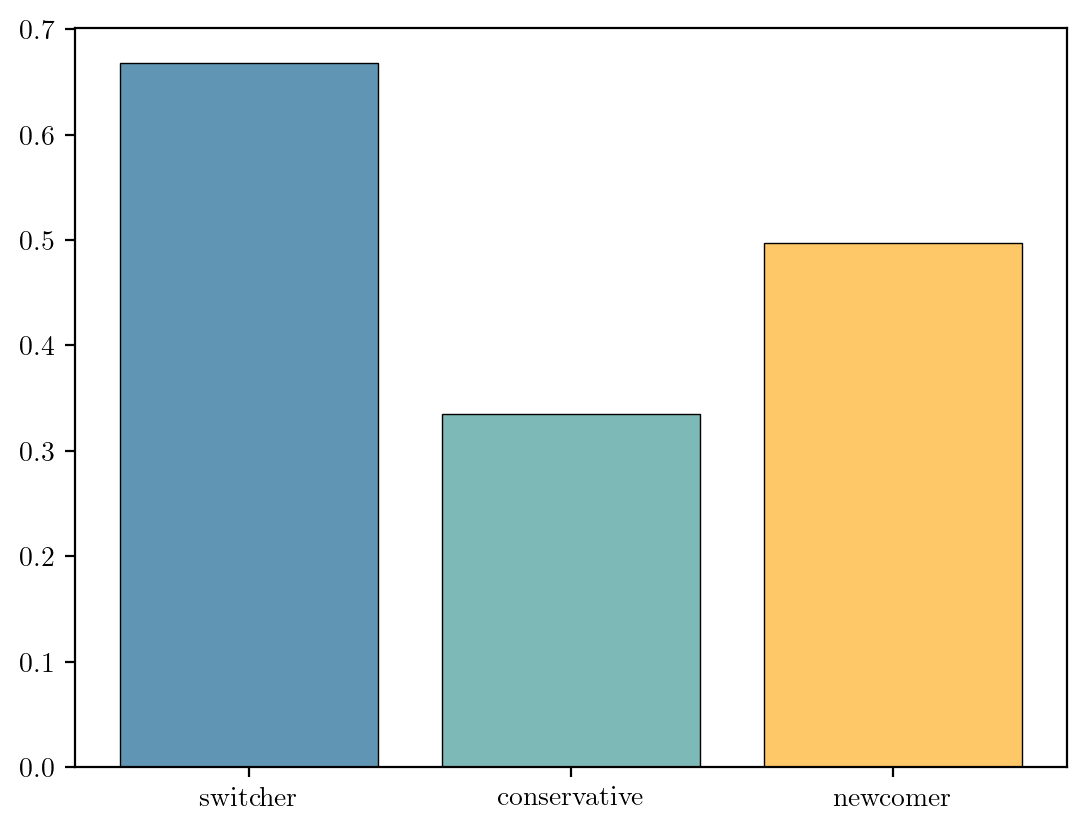

In [76]:
plt.bar(names, total/N, 
        color = ['#6096B4', '#7DB9B6', '#FEC868'], 
        edgecolor = 'black', lw=.5); #i'm plotting probabilities

for k,_ in enumerate(names):
    print(f'{names[k]}: {(total/N)[k]}')

And so i choose to be the switcher

### 100 doors scenario
In this case we simulate the same game but now the presenter opens 98 doors on turn 1, which means the switcher will be favoured

In [7]:
def goatmaker(ngames, ndoors):
    games = np.zeros([ngames, ndoors])
    
    for i in range(ngames):
        car_door = rnd.randint(0, ndoors) #i select one door
        games[i, car_door] = 1  #and set the value of that door to 1
        
    return games

In [8]:
print(goatmaker(10, 8)) #ten games each with 8 doors

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
def players98(player, doors):

    if player == 'switcher': 
        a = rnd.choice(doors)
        #print(a)
        newdoors = np.delete(doors, (doors == a).argmax())   #remove previous door from possible choices
        
        for i in range(len(doors) - 2):
            newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes 98 goats
        
        #print(newdoors)
        return rnd.choice(newdoors)  #[0] if a = 1, [0] if a = 1

    if player == 'conservative':
        return rnd.choice(doors)
        #print(b)

    if player == 'newcomer':
        for i in range(len(doors) - 3):
            newdoors = np.delete(doors, (doors == 0).argmax())   #the presenter removes 97 goats
        return rnd.choice(newdoors)
        #print(newdoors)
        #print(c)
    
    return 0

In [10]:
N = 1000 #games
d = 100 #doors

games = goatmaker(N, d)
names = ['switcher', 'conservative', 'newcomer']

testing one game for one player

In [11]:
players98(names[0], games[0])

1.0

i'm running a game for each player, playing in each game. Each column represents the score of who won, each row is a new game

In [12]:
score = np.array([[players98(n,g) for n in names] for g in games])

In [13]:
total = np.sum(score, axis=0) #total for each possible game with N iterations

print(total)

[991.  14.  12.]


In [14]:
print(games.shape)

(1000, 100)


switcher: 0.991
conservative: 0.014
newcomer: 0.012


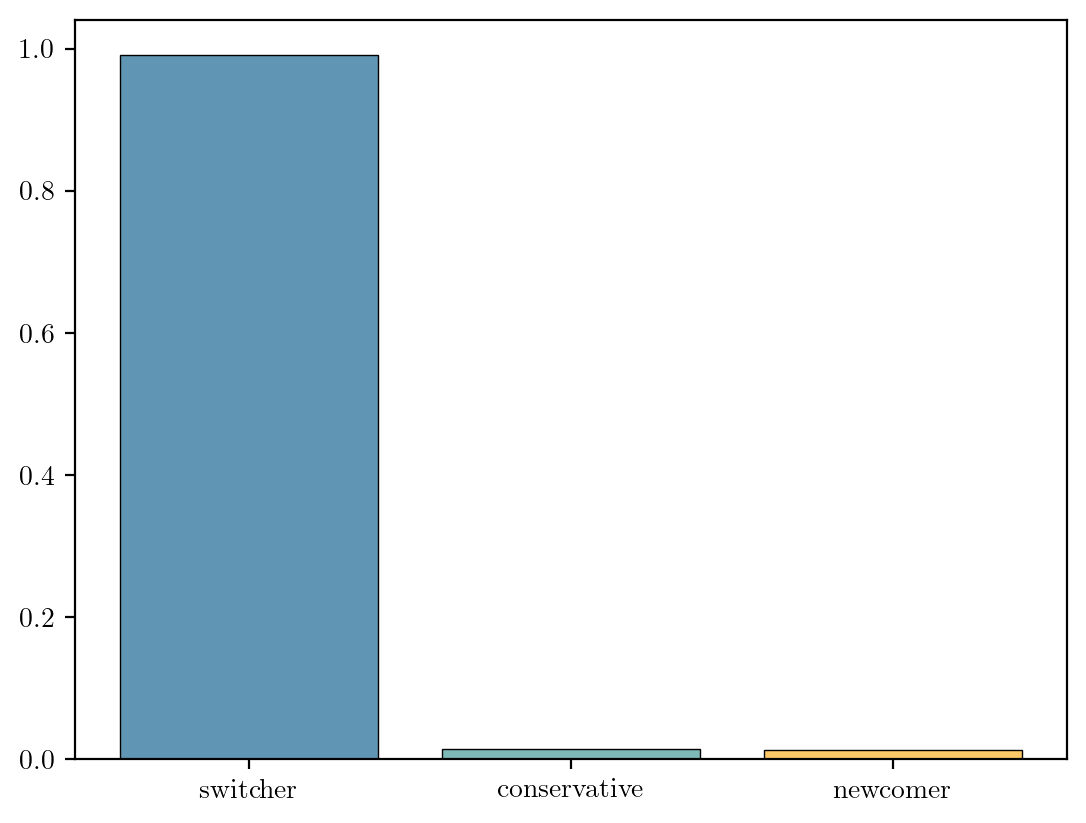

In [15]:
plt.bar(names, total/N, 
        color = ['#6096B4', '#7DB9B6', '#FEC868'], 
        edgecolor = 'black', lw=.5); #i'm plotting probabilities

for k,_ in enumerate(names):
    print(f'{names[k]}: {(total/N)[k]}')

In [45]:
probs = []

#you need at least 4 doors
ds = np.arange(4,60)

for d_i in tqdm(ds):
    g_i = goatmaker(N, d_i)
    s_i = [[players98(n,g) for n in names] for g in g_i]
    total = np.sum(s_i, axis=0) #total for each possible game with N iterations
    probs.append(total/N)

  0%|          | 0/56 [00:00<?, ?it/s]

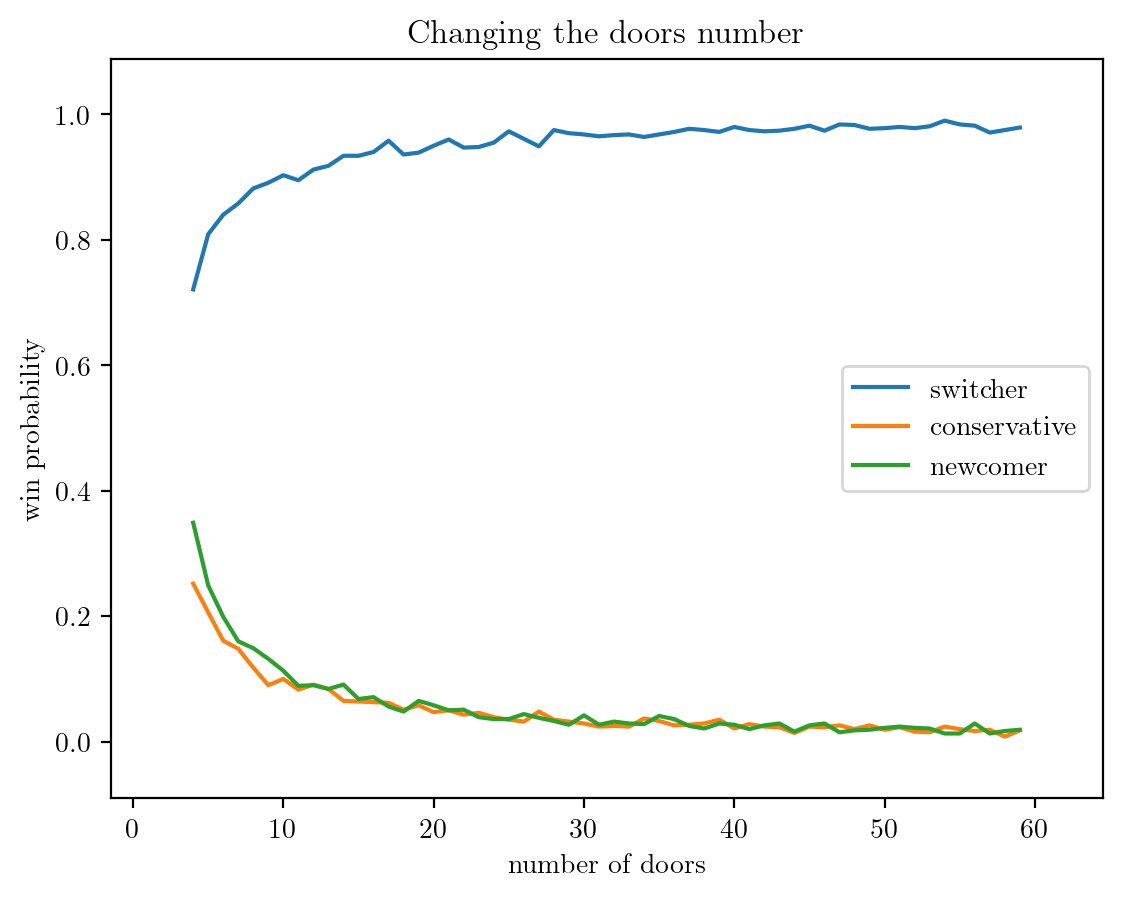

In [78]:
probs = np.array(probs)

for i,_ in enumerate(names):
    plt.plot(ds, probs[:,i], label=names[i])

plt.title('Changing the doors number')
plt.xlabel('number of doors')
plt.ylabel('win probability')
plt.legend()
plt.margins(.1);

### General case for 100 doors (switcher can pick the same door twice)
In this situation the switcher is allowed ot change door everytime the presenter opens one, so 100 times

In [79]:
#importing packages
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from tqdm.notebook import tqdm

# plot options
rc = {"text.usetex": True,
      "font.family": "serif",
      "font.sans-serif": ["Computer Modern"]
     }
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

I now have to reconfigure the presenter, i have to iterate the exclusion process. There is a subltelty though, now **the switcher can come back to the car door more than once**, in fact previously the switcher could only select one door and then change to the other, but now the switcher can change more than once. Effectively, the switcher is now able to select the prize door more than once.

In [82]:
def nplayers1(player, doors):
    
    if player == 'switcher': 
        for i in range(len(doors)-3):
            a = rnd.choice(doors)
            #newdoors = np.delete(doors, (doors == a).argmax())   #now you can't remove previous door from possible choices
            doors = np.delete(doors, (doors == 0).argmax())   #the presenter removes a goat
            
        #after removing 97 goats i'm back at the normal 3 doors game
        
        newdoors = np.delete(doors, (doors == a).argmax()) #at the last time i can
        newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes a goat
        return rnd.choice(newdoors)  #[0] if a = 1, [1] if a = 0


    if player == 'conservative':
        return rnd.choice(doors)

    if player == 'newcomer':
        #the presenter removes all goats but one
        return rnd.choice([0,1])

    return 0

In [91]:
N = 1000 #games
d = 100 #doors

games = goatmaker(N, d)
names = ['switcher', 'conservative', 'newcomer']

testing one game for one player

In [88]:
nplayers1(names[0], games[0])

0.0

i'm running a game for each player, playing in each game. Each column represents the score of who won, each row is a new game

In [89]:
score = np.array([[nplayers1(n,g) for n in names] for g in games])

In [92]:
total = np.sum(score, axis=0) #total for each possible game with N iterations

print(total)

[742.   7. 546.]


switcher: 0.742
conservative: 0.007
newcomer: 0.546


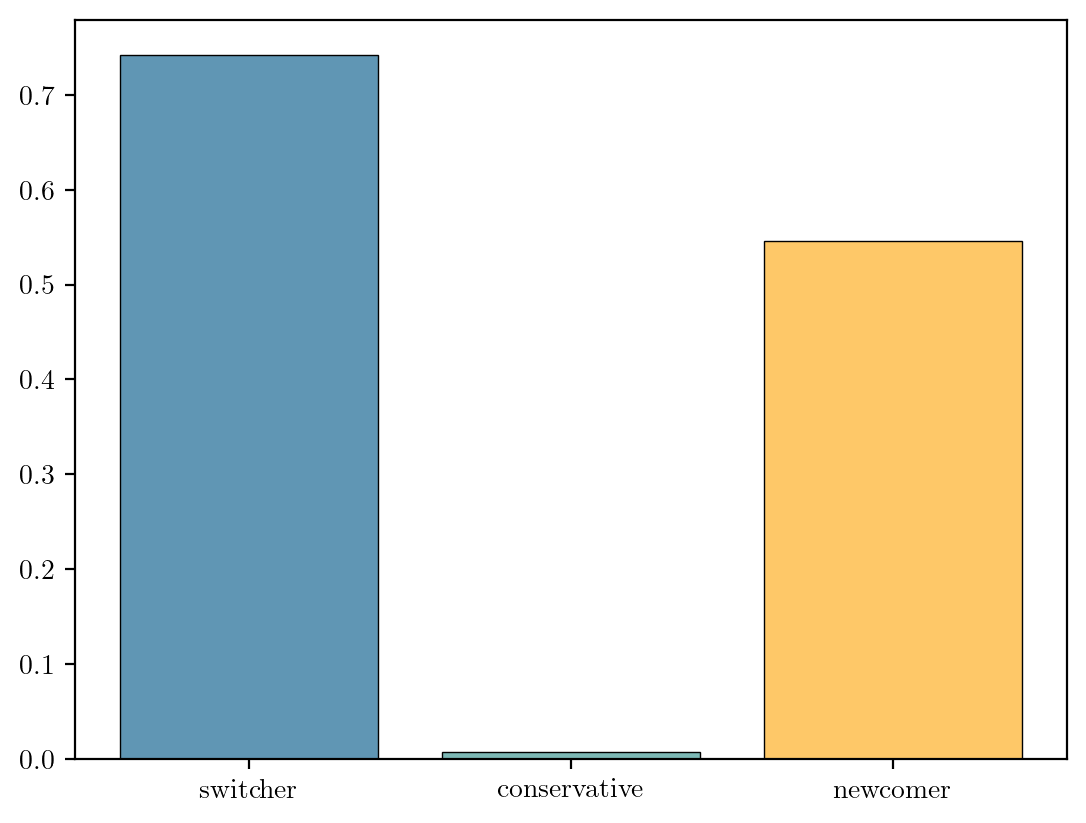

In [95]:
plt.bar(names, total/N, 
        color = ['#6096B4', '#7DB9B6', '#FEC868'], 
        edgecolor = 'black', lw=.5); #i'm plotting probabilities

for k,_ in enumerate(names):
    print(f'{names[k]}: {(total/N)[k]}')

the chances increased from 66% to 75%, let's look at how this number changes with the number of doors

In [97]:
probs = []

#you need at least 4 doors
ds = np.arange(4,60)

for d_i in tqdm(ds):
    g_i = goatmaker(N, d_i)
    s_i = [[nplayers1(n,g) for n in names] for g in g_i]
    total = np.sum(s_i, axis=0) #total for each possible game with N iterations
    probs.append(total/N)

  0%|          | 0/56 [00:00<?, ?it/s]

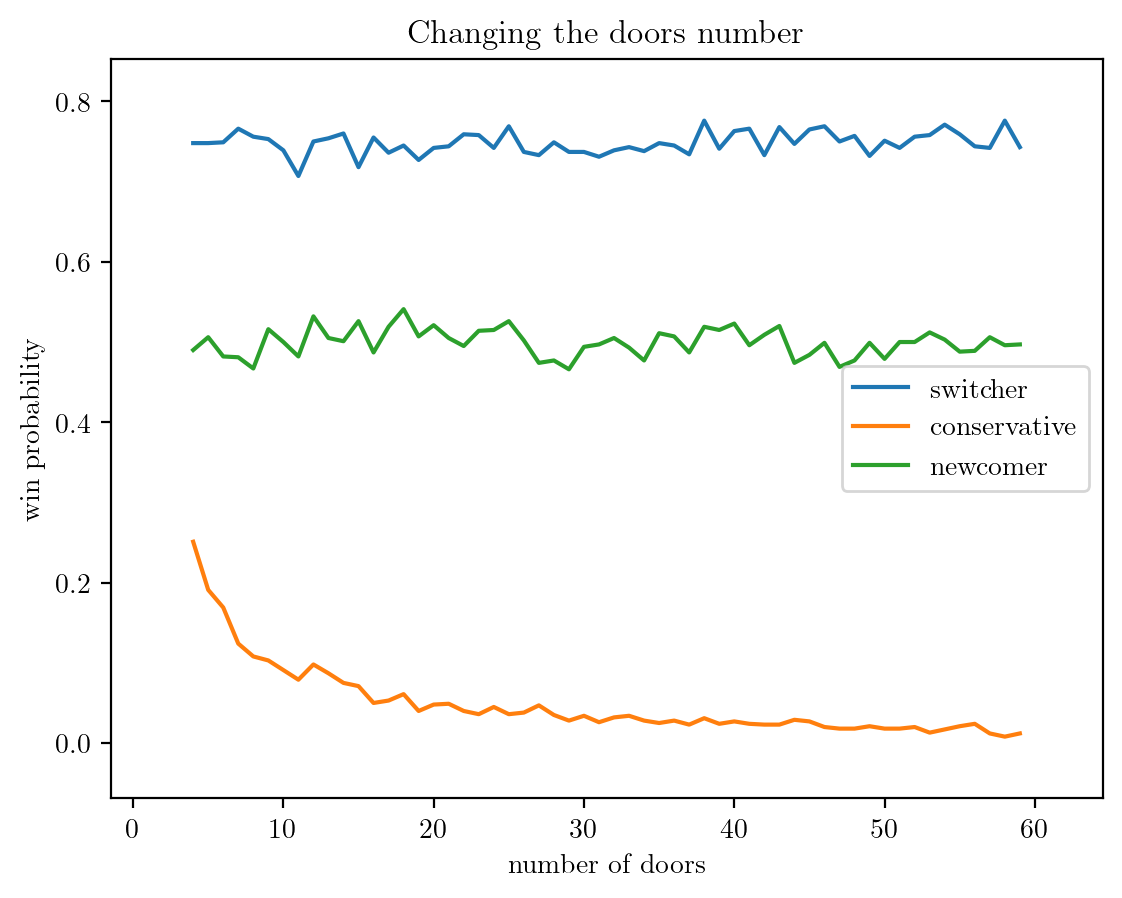

In [98]:
probs = np.array(probs)

for i,_ in enumerate(names):
    plt.plot(ds, probs[:,i], label=names[i])

plt.title('Changing the doors number')
plt.xlabel('number of doors')
plt.ylabel('win probability')
plt.legend()
plt.margins(.1);

### General case for 100 doors (switcher can't pick the same door twice)
In this situation the switcher is allowed ot change door everytime the presenter opens one, so 100 times but now once he chooses a door he can't go back to its previous choice

In [100]:
def nplayers2(player, doors):
    
    if player == 'switcher': 
        a = 0
        newdoors = np.delete(doors, (doors == a).argmax())   #now you can remove previous door from possible choices
        
        for i in range(int(len(doors)/2 - 1)): #now i remove two doors at a time
            newdoors = np.delete(newdoors, (newdoors == a).argmax())
            newdoors = np.delete(newdoors, (newdoors == 0).argmax())   #the presenter removes a goat
            a = rnd.choice(newdoors)
            #print(a)
            #print(newdoors)

    
        return rnd.choice(newdoors)  #[0] if a = 1, [1] if a = 0


    if player == 'conservative':
        return rnd.choice(doors)

    if player == 'newcomer':
        #the presenter removes all goats but one
        return rnd.choice([0,1])
            
    return 0

In [101]:
N = 1000 #games
d = 100 #doors

games = goatmaker(N, d)
names = ['switcher', 'conservative', 'newcomer']

testing one game for one player

In [102]:
nplayers2(names[0], games[0])

0.0

i'm running a game for each player, playing in each game. Each column represents the score of who won, each row is a new game

In [104]:
score = np.array([[nplayers2(n,g) for n in names] for g in games])

In [105]:
total = np.sum(score, axis=0) #total for each possible game with N iterations

print(total)

[116.   6. 495.]


switcher: 0.116
conservative: 0.006
newcomer: 0.495


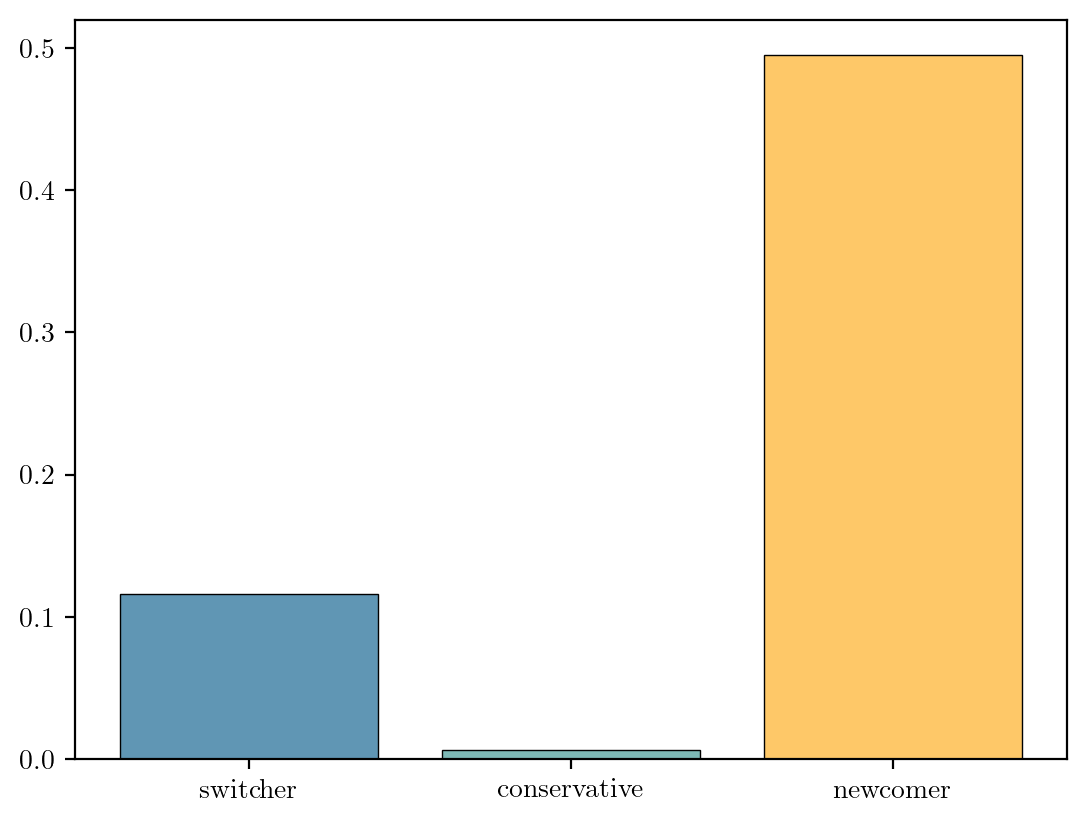

In [106]:
plt.bar(names, total/N, 
        color = ['#6096B4', '#7DB9B6', '#FEC868'], 
        edgecolor = 'black', lw=.5); #i'm plotting probabilities

for k,_ in enumerate(names):
    print(f'{names[k]}: {(total/N)[k]}')

the chances increased from 75% to barely 11%, let's look at how this number changes with the number of doors

In [107]:
probs = []

#you need at least 4 doors
ds = np.arange(4,60)

for d_i in tqdm(ds):
    g_i = goatmaker(N, d_i)
    s_i = [[nplayers2(n,g) for n in names] for g in g_i]
    total = np.sum(s_i, axis=0) #total for each possible game with N iterations
    probs.append(total/N)

  0%|          | 0/56 [00:00<?, ?it/s]

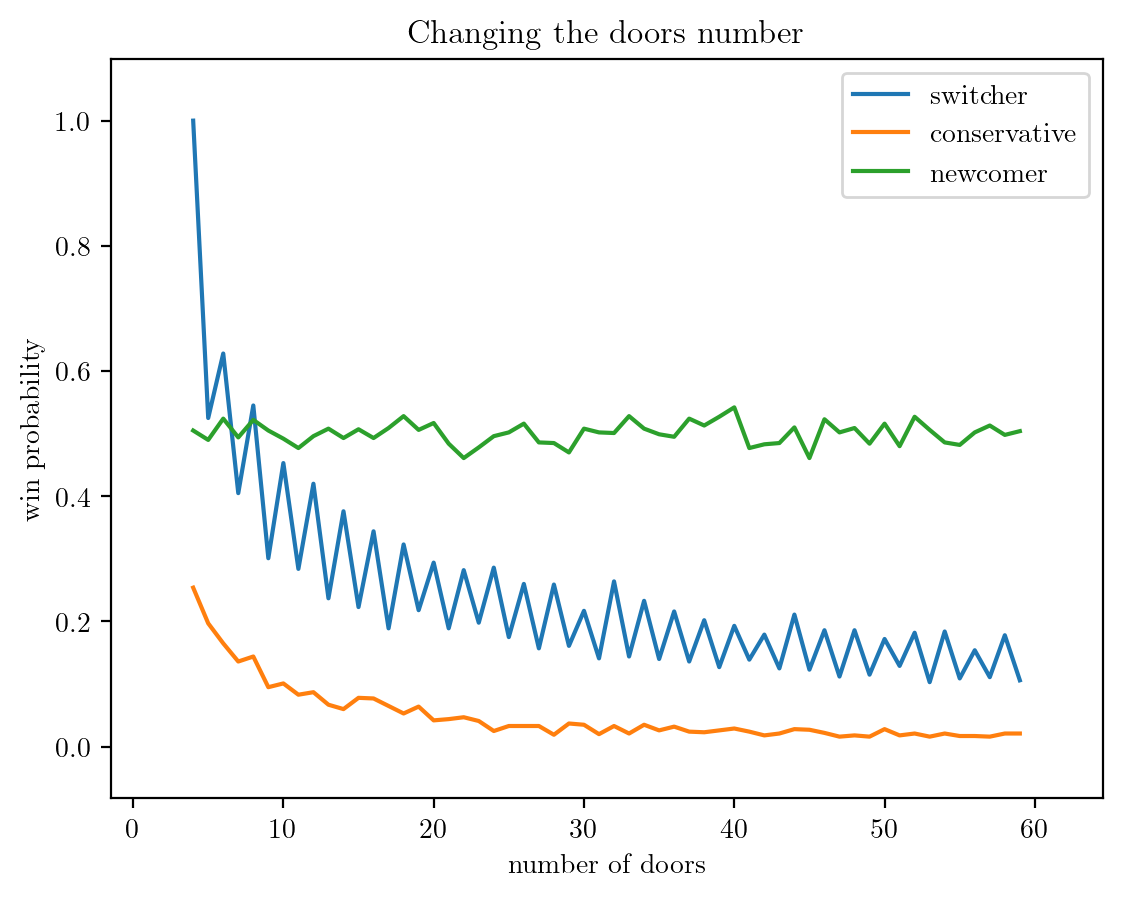

In [108]:
probs = np.array(probs)

for i,_ in enumerate(names):
    plt.plot(ds, probs[:,i], label=names[i])

plt.title('Changing the doors number')
plt.xlabel('number of doors')
plt.ylabel('win probability')
plt.legend()
plt.margins(.1);

----

# PDF of the Log

1. Use `numpy` to draw $N$ (where $N$ is large...) random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.
2. Use matplotlib to make a histogram of these samples.
3. Compute the base-10 log of your array $x$, and store this as $y$.
4. Make another histogram for $y$. Using the equation to transform probability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram.
5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$. 

You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples. 

In [110]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
# plot options
rc = {"text.usetex": True,
      "font.family": "serif",
      "font.sans-serif": ["Computer Modern"]
     }

plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

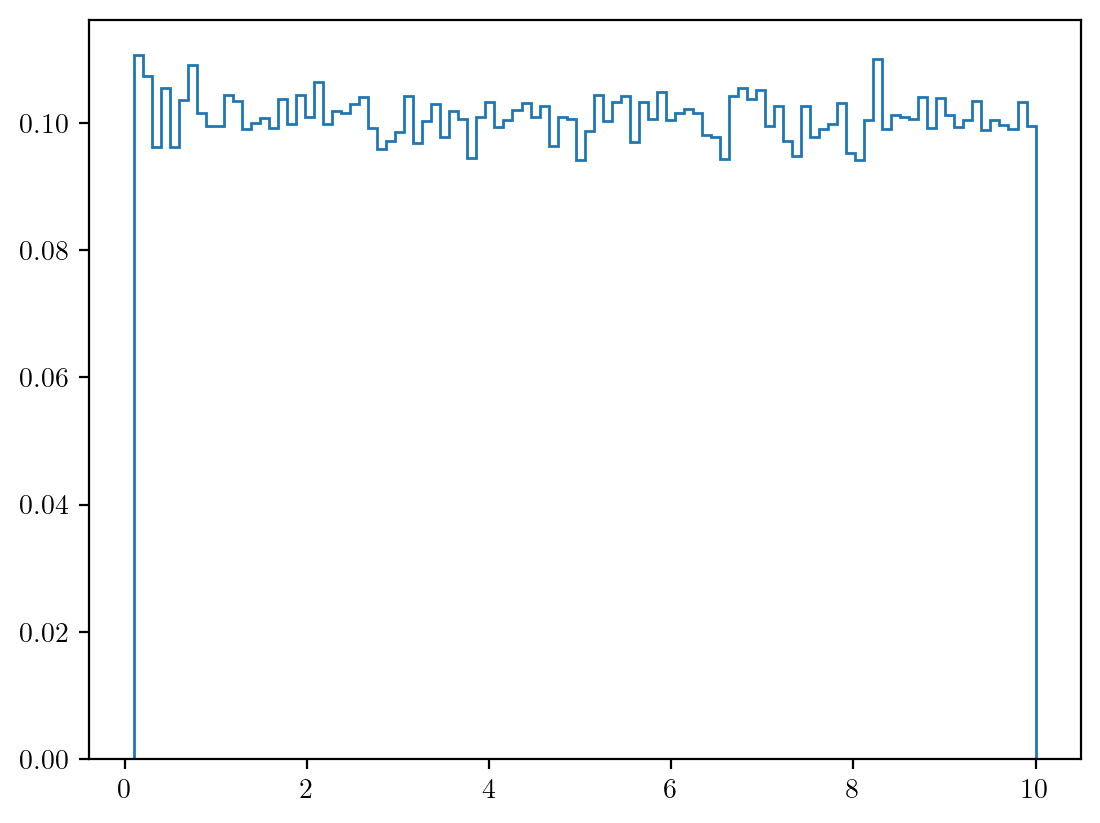

In [122]:
N = int(1e5)
x = np.random.uniform(.1, 10, N)
plt.hist(x, histtype='step', density=True, bins = 100);

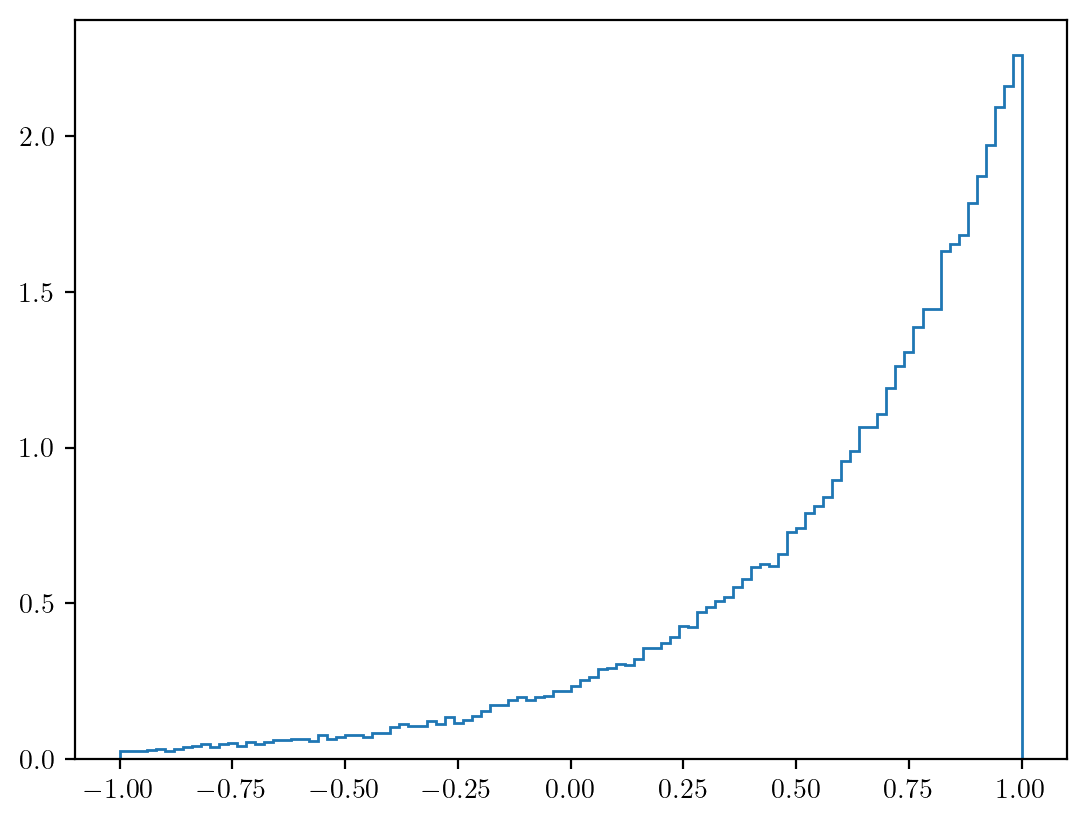

In [123]:
y = np.log10(x)
plt.hist(y, histtype='step', density=True, bins = 100);

Compute the pdf

$y=\log_{10} x$

$x=10^y$

$\frac{dx}{dy} = 10^y \log(10)$

Uniform in x:
$p(x) = \frac{1}{10-0.1}$


Therefore $p(y) =10^y \log(10) /(10-0.1)$


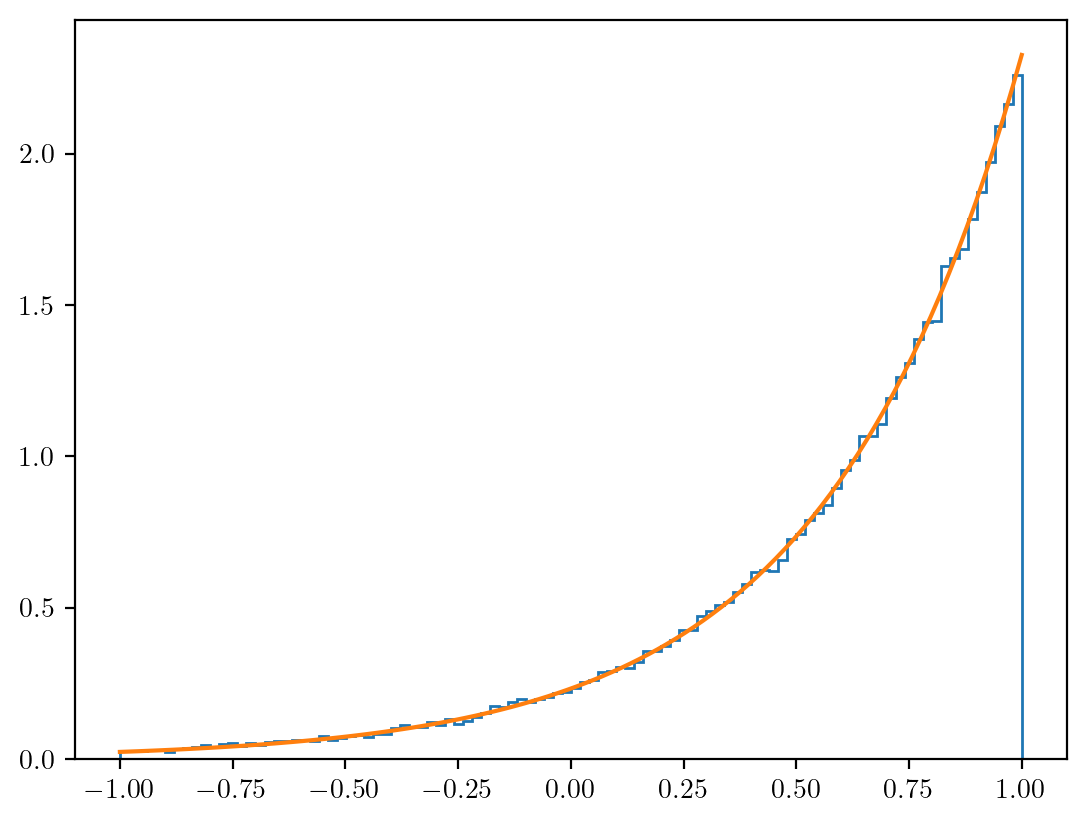

In [124]:
ygrid=np.linspace(-1,1,100)
pdf = lambda x: 10**x *np.log(10)/(10-0.1)


plt.hist(y, histtype='step', density=True, bins = 100);
plt.plot(ygrid,pdf(ygrid))

In [155]:
print(f'Log mean x: {round(np.log10(np.mean(x)),3)}     mean of y: {round(np.mean(y), 3)}')
print(f'Log median x: {round(np.log10(np.median(x)),3)}   median of y: {round(np.median(y), 3)}')

Log mean x: 0.702     mean of y: 0.583
Log median x: 0.703   median of y: 0.703


The means are different but the median is the same the mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples.